# let's first stat by creating some training and test data and adding some noise to them

In [2]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples = 1400, noise = .2)  

X_train, y_train = X[:1000] , y[:1000] # 1000 training data
X_test, y_test = X[1000:] , y[1000:] # 400 test data

# let's create a Simple Neural Networks that has one hidden layer with 25 neurones that uses binary crossentropy as a loss and accuracy as metric.

(a good resource to understand binary crossentropy : https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(100,activation = 'relu', input_shape= (2,)))
model.add(Dense(25,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = Adam() , metrics = ['accuracy'])

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


# let's also add an earlystopping, it's basically a callback and what it does is if the value we are monitoring repeats itself a specific number of time, the fitting will automatically stop, it helps avoid overfitting

# In our case, we are monitoring the validation loss with a patience equals 4.

In [4]:
from keras.callbacks import EarlyStopping
batch_size = 64
epoch = 100

eas = EarlyStopping(monitor = 'val_loss', patience = 4) 

hist = model.fit(X_train,y_train,callbacks = [eas],batch_size = batch_size, epochs = epoch, validation_data = (X_test,y_test))

Train on 1000 samples, validate on 400 samples
Epoch 1/100
1000/1000 [==============================] - 0s 251us/step - loss: 0.6529 - accuracy: 0.7550 - val_loss: 0.6001 - val_accuracy: 0.8375
Epoch 2/100
1000/1000 [==============================] - 0s 38us/step - loss: 0.5520 - accuracy: 0.8370 - val_loss: 0.5042 - val_accuracy: 0.8325
Epoch 3/100
1000/1000 [==============================] - 0s 38us/step - loss: 0.4589 - accuracy: 0.8350 - val_loss: 0.4212 - val_accuracy: 0.8350
Epoch 4/100
1000/1000 [==============================] - 0s 48us/step - loss: 0.3866 - accuracy: 0.8430 - val_loss: 0.3628 - val_accuracy: 0.8575
Epoch 5/100
1000/1000 [==============================] - 0s 37us/step - loss: 0.3405 - accuracy: 0.8490 - val_loss: 0.3284 - val_accuracy: 0.8675
Epoch 6/100
1000/1000 [==============================] - 0s 40us/step - loss: 0.3109 - accuracy: 0.8610 - val_loss: 0.3063 - val_accuracy: 0.8675
Epoch 7/100
1000/1000 [==============================] - 0s 43us/step - loss

1000/1000 [==============================] - 0s 35us/step - loss: 0.0777 - accuracy: 0.9670 - val_loss: 0.0887 - val_accuracy: 0.9550
Epoch 57/100
1000/1000 [==============================] - 0s 33us/step - loss: 0.0759 - accuracy: 0.9740 - val_loss: 0.0875 - val_accuracy: 0.9525
Epoch 58/100
1000/1000 [==============================] - 0s 31us/step - loss: 0.0746 - accuracy: 0.9720 - val_loss: 0.0898 - val_accuracy: 0.9575
Epoch 59/100
1000/1000 [==============================] - 0s 32us/step - loss: 0.0746 - accuracy: 0.9710 - val_loss: 0.0890 - val_accuracy: 0.9575
Epoch 60/100
1000/1000 [==============================] - 0s 32us/step - loss: 0.0745 - accuracy: 0.9680 - val_loss: 0.0869 - val_accuracy: 0.9550
Epoch 61/100
1000/1000 [==============================] - 0s 31us/step - loss: 0.0739 - accuracy: 0.9730 - val_loss: 0.0877 - val_accuracy: 0.9550
Epoch 62/100
1000/1000 [==============================] - 0s 31us/step - loss: 0.0734 - accuracy: 0.9710 - val_loss: 0.0868 - val_a

# plotting the our labels given the two features and adding a contour to see how good is our model.

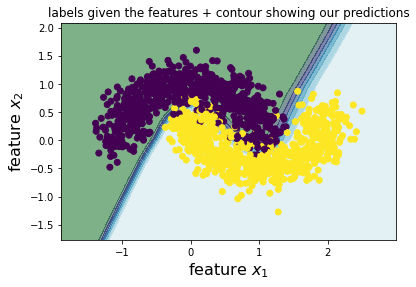

In [21]:
import numpy as np
import matplotlib.pyplot as plt

feat0_min = min(X[:,0]) - .5
feat0_max = max(X[:,0]) +.5

feat1_min = min(X[:,1]) -.5
feat1_max = max(X[:,1]) +.5

h = .02
zer = np.arange(feat0_min,feat0_max,h)
fir = np.arange(feat1_min,feat1_max,h)

xx , yy = np.meshgrid(zer,fir)
z = np.c_[xx.ravel(),yy.ravel()]
pred = model.predict(z)

Z = pred.reshape(xx.shape)

plt.contourf(xx, yy, Z,cmap =plt.cm.ocean , alpha = .5)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

plt.xlabel('feature $x_1$', size=16)
plt.ylabel('feature $x_2$', size=16)
plt.title('labels given the features + contour showing our predictions', size=12)

plt.show()

# let's now check the accuracy and loss to make sure we are not falling in overfitting.

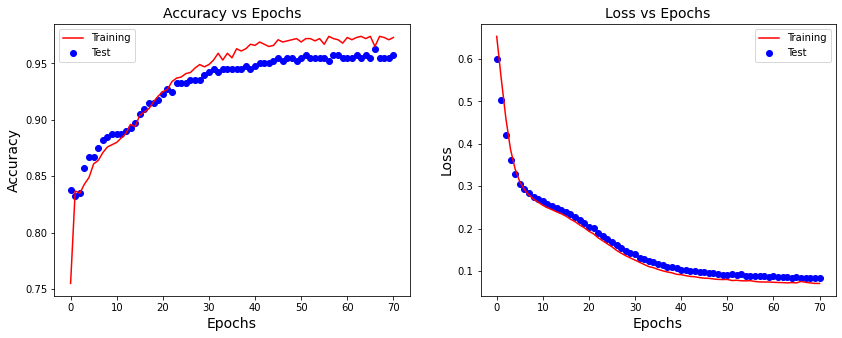

In [10]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

lo = hist.history['loss']
val_lo = hist.history['val_loss']

plt.figure(figsize= (14,5))


plt.subplot(1,2,1)
plt.plot(np.arange(len(acc)), acc,c = 'r', label = 'Training')
plt.scatter(np.arange(len(acc)), val_acc, c = 'b', label = 'Test')
plt.ylabel('Accuracy', size = 14)
plt.xlabel('Epochs' , size  =14)
plt.title('Accuracy vs Epochs', size=14)
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(len(acc)), lo,c = 'r', label = 'Training')
plt.scatter(np.arange(len(acc)), val_lo, c = 'b', label = 'Test')
plt.ylabel('Loss',size = 14)
plt.xlabel('Epochs', size = 14)
plt.title('Loss vs Epochs', size=14)
plt.legend()

plt.show()